In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df = pd.read_csv('twitter_.csv')

In [ ]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [ ]:
df.describe() # Me interesa que la desviacion sea grande. pa poder clusterizar

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40eae96490>,
      dtype=object)

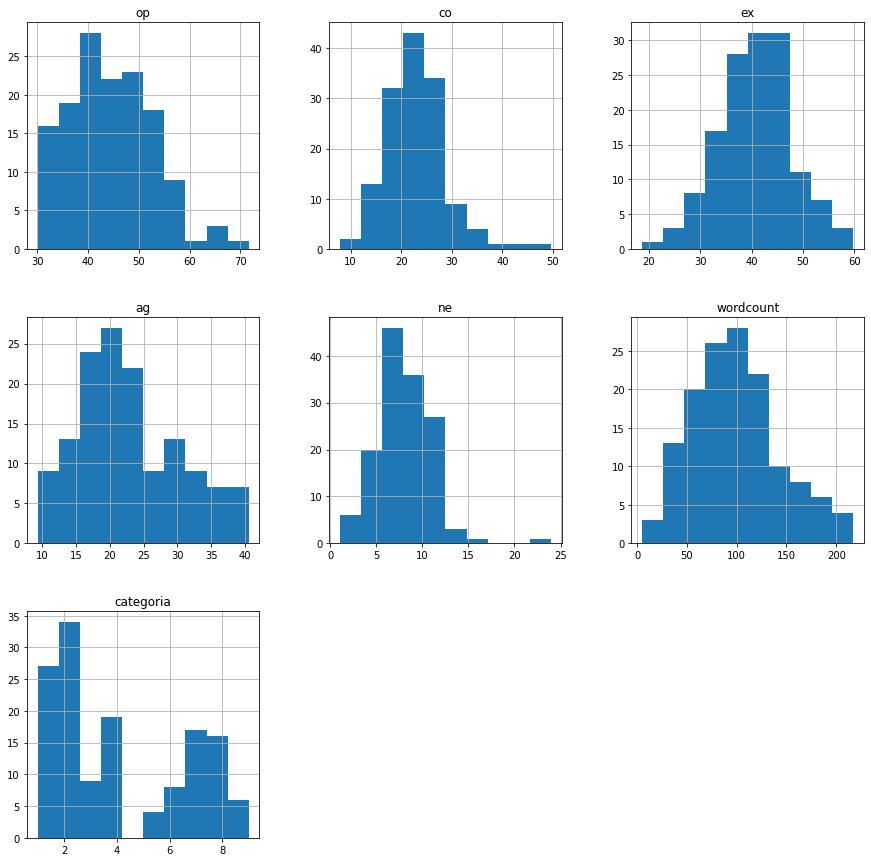

In [ ]:
df.hist(figsize = (15,15))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


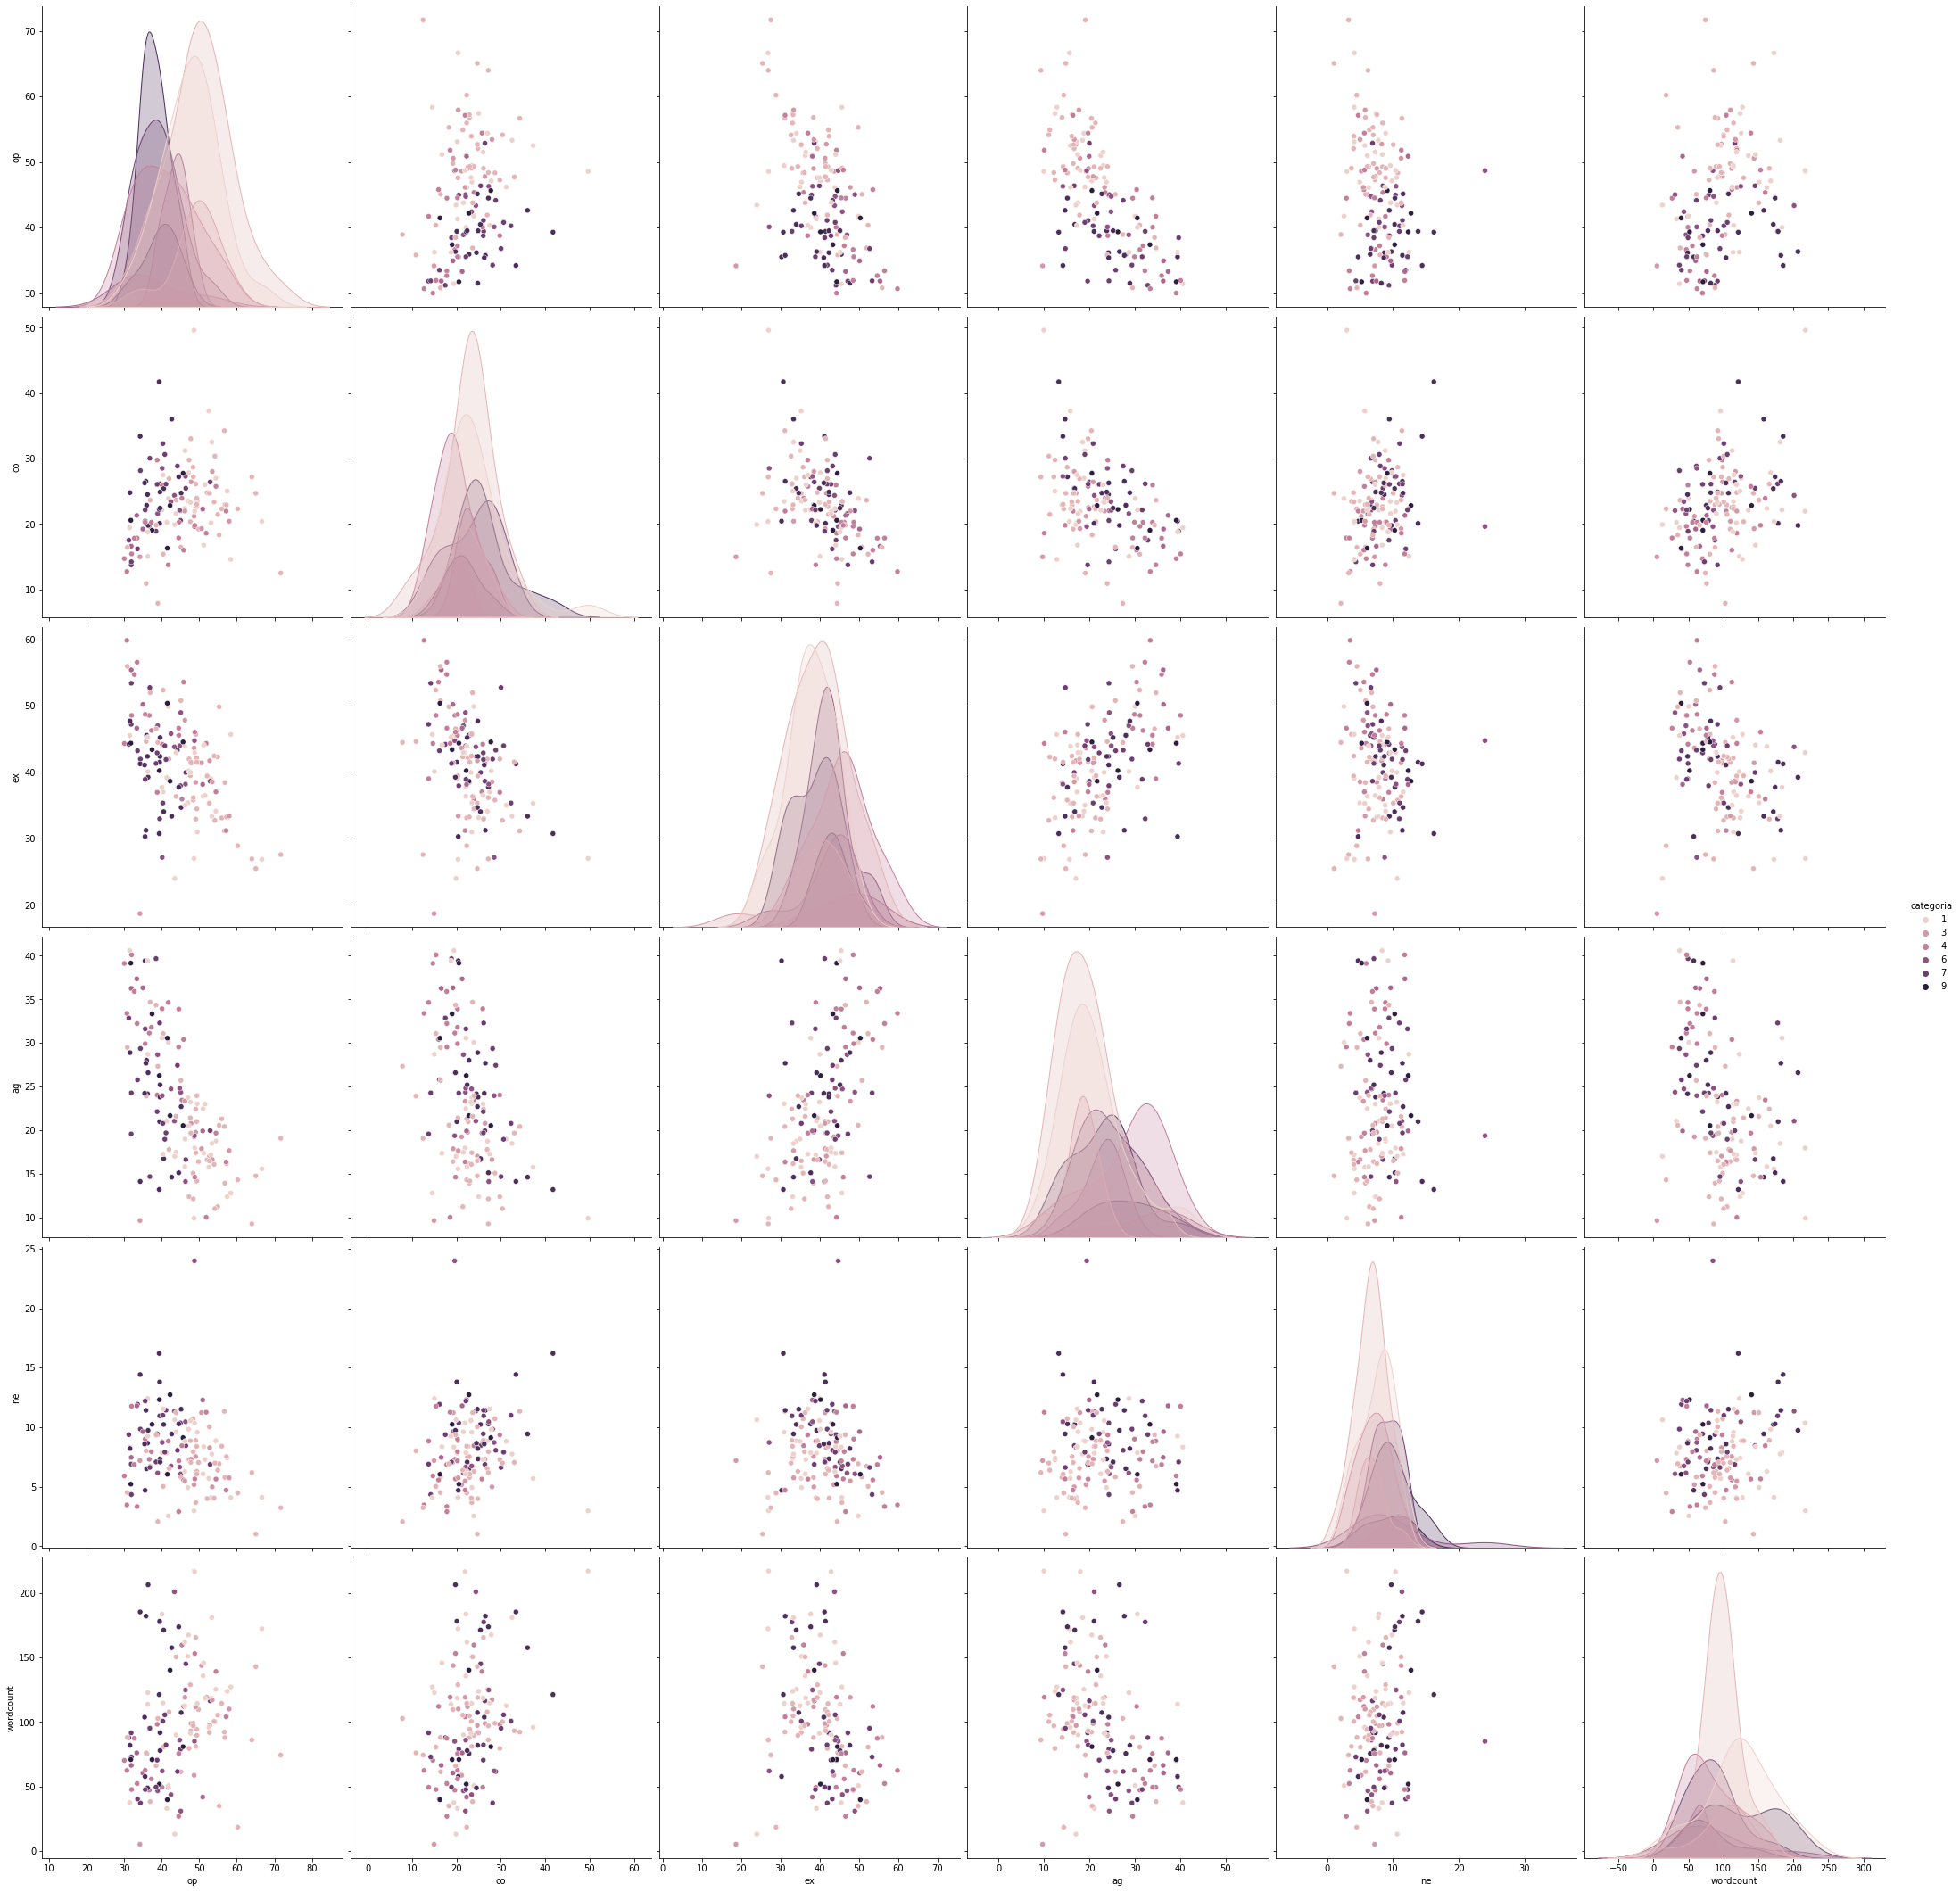

In [ ]:
sb.pairplot(df.dropna(),hue = 'categoria', size=5,vars= ['op','co','ex','ag','ne','wordcount'],kind= 'scatter')

In [ ]:
X= np.array(df[['op','co','ex','ag','ne','wordcount']])

In [ ]:
X.shape

(140, 6)

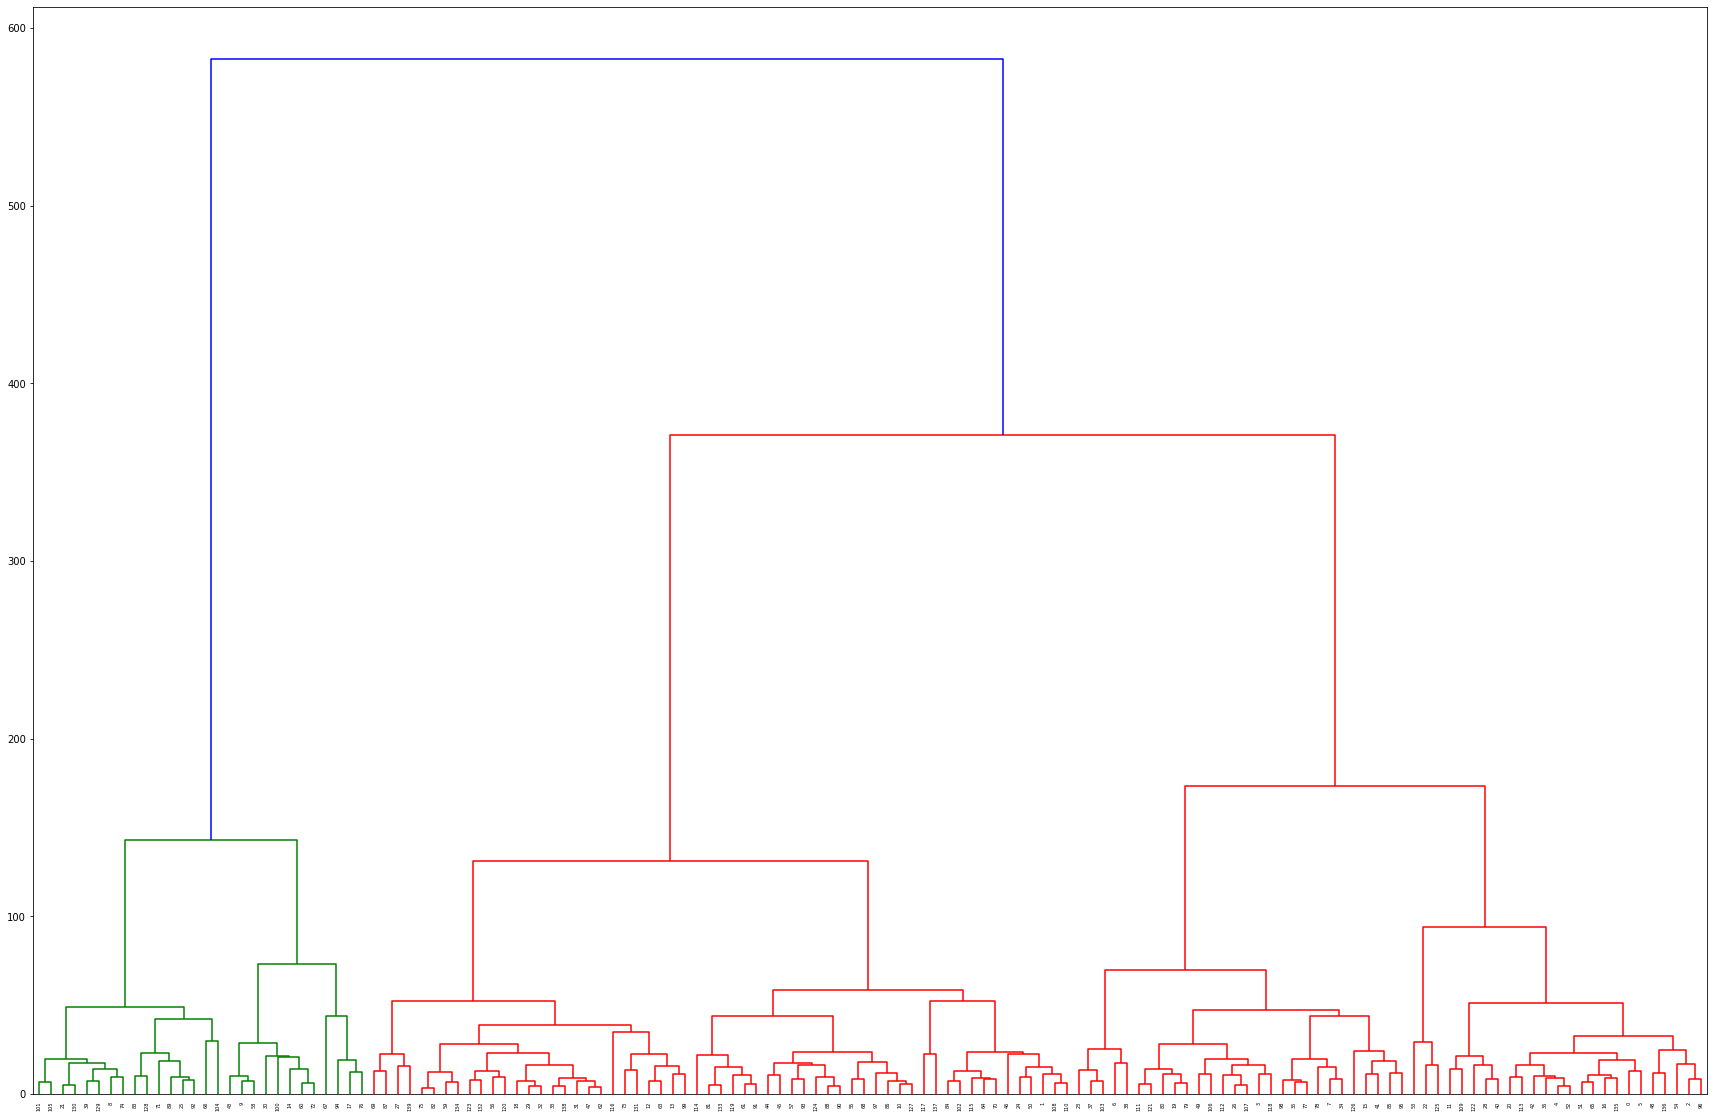

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
sch.dendrogram(sch.linkage(X, method= 'ward', metric='euclidean'),ax=ax)
plt.show()

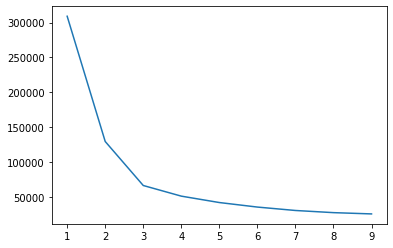

In [ ]:
val = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++')
  kmeans.fit(X)
  val.append(kmeans.inertia_)
plt.plot(range(1,10),val)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(X)

array([[ 66.57524949, 132.0573967 ,  17.26652486],
       [ 23.71571135,  89.5890666 ,  29.31620369],
       [ 55.52126856, 120.44385662,  10.45214002],
       [ 29.06090521,  90.53113752,  30.84156023],
       [ 57.37390021, 122.65565368,   6.90145839],
       [ 63.84434464, 129.28420454,  14.15935513],
       [ 22.17386219,  79.51186843,  42.51133489],
       [ 45.05097539, 106.15460099,  21.53153229],
       [ 43.78327539,  23.36572013,  95.17516681],
       [ 77.83377715,  17.79846899, 126.92597915],
       [  7.75677158,  71.30989884,  49.76911027],
       [ 69.01886109, 135.45380801,  20.89556598],
       [ 25.81564602,  43.63876793,  77.27819297],
       [ 27.62278615,  39.6965942 ,  78.52789507],
       [ 77.38922033,  15.04428599, 127.28174913],
       [ 43.29194333, 109.885671  ,  15.90019978],
       [ 54.74615922, 120.05927555,   7.94553368],
       [ 99.72847016,  33.91515745, 150.0994907 ],
       [ 10.4699747 ,  59.16741632,  60.72968686],
       [ 41.88076054, 102.06184

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
centroides = kmeans.cluster_centers_

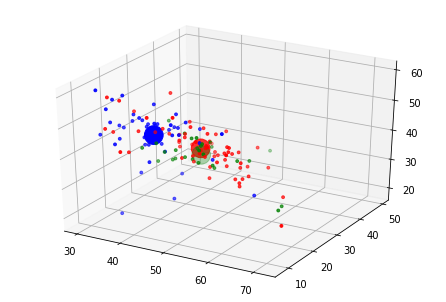

In [ ]:
colores = [ 'r', 'g', 'b']
asignacion= []
for row in y_pred:
  asignacion.append(colores[row])
  
fig = plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignacion, s=8)
ax.scatter(centroides[:,0],centroides[:,1],centroides[:,2],c=colores,marker='o',s=350)

**Silhouette**

In [ ]:
silhouette_score(X,kmeans.labels_)

0.4707733265993714

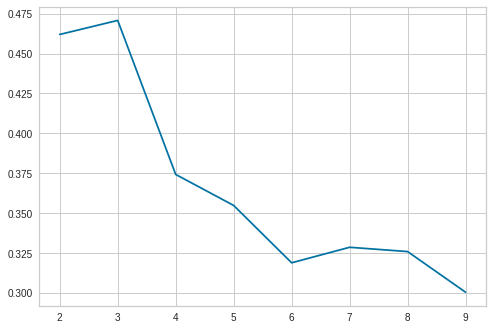

In [ ]:
val = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++')
  kmeans.fit(X)
  val.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,10),val)

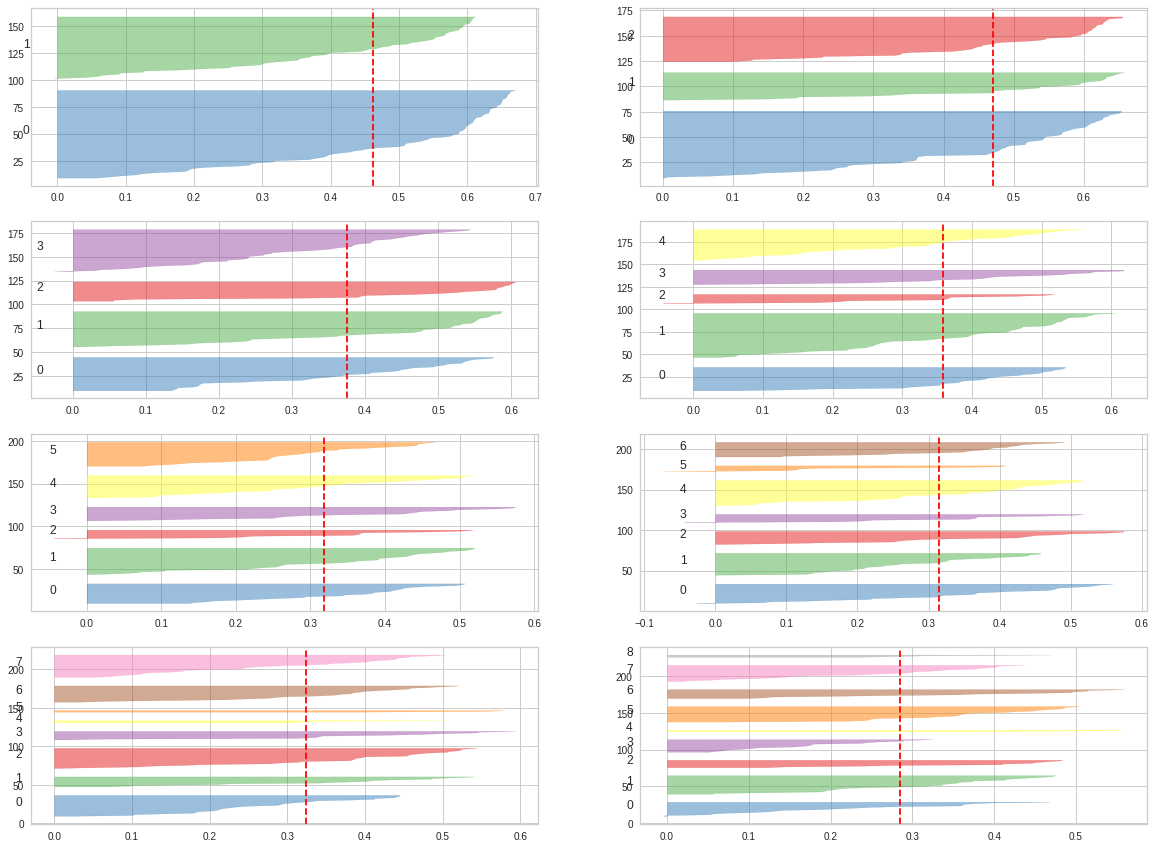

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
for i in range(2,10):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**gap statistic**

In [ ]:
pip install gap-stat==2.0.1 
#https://libraries.io/pypi/gap-stat

In [ ]:
pip install gapstat-rs

     |████████████████████████████████| 814 kB 5.2 MB/s 


In [ ]:
from gap_statistic import OptimalK

In [ ]:
optimalK = OptimalK(parallel_backend='rust')
optimalK

OptimalK(n_jobs=2, parallel_backend="rust")

In [ ]:
n_clusters = optimalK(X, cluster_array=np.arange(1, 15))

In [ ]:
optimalK.gap_df.head()

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,0.890361,266751.906582,72354.781355,0.165601,315482.112728,0.044605,315781.405461
1,2.0,0.964311,292866.514147,53369.481214,0.118556,341896.013025,0.113369,343275.603331
2,3.0,0.984984,295758.942490,60010.968395,0.134041,346168.031673,0.056008,339523.099510
3,4.0,0.969062,280340.130503,16975.119571,0.040086,324104.287524,0.038660,322961.861542
4,5.0,0.956845,274415.390350,10995.166632,0.026443,317037.121388,0.021338,325317.633207


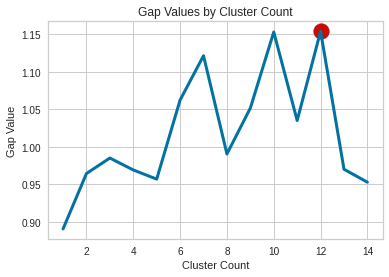

In [ ]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()